In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.datasets import load_wine
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from keras.layers import Dense, Input, concatenate, Dropout
from keras.models import Model
#from keras.optimizers import RMSprop

In [ ]:
df = pd.read_csv('Pred-both.csv')
df

,Temp,RH,LWD1,LWD2,LWD3,LWD4,S1_D1,S1_D2,S1_D3,S2_D1,...,S4_D1,S4_D2,S4_D3,D1,D2,D3,S1,S2,S3,S4
0,29.591519,84.399239,13.4,0.0,10.1,0.0,0,1,0,0,...,0,0,0,No,Yes,No,D2,None,D2,None
1,28.901842,76.797563,0.0,10.1,7.1,0.0,0,0,0,0,...,0,0,0,No,Yes,No,None,D2,None,None
2,29.052893,82.372721,0.0,15.3,39.2,0.0,0,0,0,0,...,0,0,0,No,Yes,No,None,D2,None,None
3,29.749662,87.107381,0.0,19.4,0.0,0.0,0,0,0,0,...,0,0,0,No,Yes,No,None,D2,None,None
4,29.133618,89.635281,0.0,9.6,2.5,0.0,0,0,0,0,...,0,0,0,No,Yes,No,None,D2,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,29.441010,84.367210,14.7,12.7,0.0,2.6,0,1,0,0,...,0,0,0,No,Yes,No,D2,D2,None,None
858,27.557671,74.558253,0.0,4.7,4.7,0.0,0,0,0,0,...,0,0,0,No,Yes,No,None,D2,D2,None
859,29.884013,85.268110,12.2,12.8,0.0,0.0,0,1,0,0,...,0,0,0,No,Yes,No,D2,D2,None,None
860,29.482001,89.066567,1.1,18.6,28.5,0.5,0,0,0,0,...,0,0,0,No,Yes,No,None,D2,None,None


# Data Preparation

In [ ]:
df1 = pd.read_csv('df1.csv')
df2 = pd.read_csv('df2.csv')
df3 = pd.read_csv('df3.csv')
print(len(df1),len(df2),len(df3))

1400 1400 1400


In [ ]:
from sklearn import preprocessing

minmax = preprocessing.MinMaxScaler()

df1[['temp', 'rh', 'lwd1']] = minmax.fit_transform(df1[['Temp', 'RH', 'LWD1']])
df2[['temp', 'rh', 'lwd2']] = minmax.fit_transform(df2[['Temp', 'RH', 'LWD2']])
df3[['temp', 'rh', 'lwd3']] = minmax.fit_transform(df3[['Temp', 'RH', 'LWD3']])
df1.describe()

,Temp,RH,LWD1,D1,D2,temp,rh,lwd1
count,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000
mean,28.050666,76.177839,8.982320,0.195000,0.955000,0.808349,0.537286,0.289812
std,1.422316,9.151949,3.911497,0.396342,0.207378,0.129022,0.303577,0.241948
min,19.139545,59.980263,4.297017,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.913882,68.284870,5.697850,0.000000,1.000000,0.705229,0.275470,0.086649
50%,28.155309,76.746819,8.001794,0.000000,1.000000,0.817841,0.556159,0.229161
75%,29.407436,84.827890,11.200000,0.000000,1.000000,0.931425,0.824214,0.426988
max,30.163399,90.127304,20.463694,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from sklearn.model_selection import train_test_split

X1=df1[['temp','rh','lwd1']]
Y1=df1[['D1','D2']]

X2=df2[['temp','rh','lwd2']]
Y2=df2[['D1','D2']]

X3=df3[['temp','rh','lwd3']]
Y3=df3[['D1','D2']]

YD1=pd.DataFrame(columns=['S1','S2','S3'])
YD1['S1']=Y1['D1']
YD1['S2']=Y2['D1']
YD1['S3']=Y3['D1']

YD2=pd.DataFrame(columns=['S1','S2','S3'])
YD2['S1']=Y1['D2']
YD2['S2']=Y2['D2']
YD2['S3']=Y3['D2']

YD1['S1'] = np.where(YD1['S1']==0.0,int(0),int(1))
YD1['S2'] = np.where(YD1['S2']==0,int(0),int(1))
YD1['S3'] = np.where(YD1['S3']==0.0,int(0),int(1))

YD2['S1'] = np.where(YD2['S1']==0.0,int(0),int(1))
YD2['S2'] = np.where(YD2['S2']==0,int(0),int(1))
YD2['S3'] = np.where(YD2['S3']==0.0,int(0),int(1))

x1_train,x1_test = train_test_split(X1, train_size = 0.80, random_state=20)
x2_train,x2_test = train_test_split(X2, train_size = 0.80, random_state=20)
x3_train,x3_test = train_test_split(X3, train_size = 0.80, random_state=20)
YD1_train, YD1_test, YD2_train, YD2_test = train_test_split(YD1,YD2, train_size=0.8, random_state=20)

In [ ]:
print(YD1_test.sum(axis=0))
print(YD2_test.sum(axis=0))
print(len(YD1_test), len(YD2_test))

S1    43
S2    46
S3    55
dtype: int64
S1    268
S2    264
S3    263
dtype: int64
280 280


In [ ]:
'''YD1_test.to_csv('F:\jrf-project\Data\Server data\GAN\d1test.csv')
YD2_test.to_csv('F:\jrf-project\Data\Server data\GAN\d2test.csv')'''

## Assigning class weights

In [ ]:
w1={0:(337/(61*2)), 1:(337/(328*2))}
w2={0:(337/(24*2)), 1:(337/(322*2))}
w3={0:(337/(24*2)), 1:(337/(328*2))}
weights={'output1':w1,'output2':w2,'output3':w3}

## Attention Layer

In [ ]:
from keras import regularizers

# define three sets of inputs corresponding to the three nodes
inputA = Input(shape=(3,))
inputB = Input(shape=(3,))
inputC = Input(shape=(3,))

# the first branch operates on the first input
x = Dense(48, activation="relu")(inputA)
x = Dense(36, activation="relu")(x)
#x = Dense(20, activation="relu")(x)
#x = Dense(16, activation="relu")(x)
x = Dense(10, activation="relu")(x)
x = Dense(3, activation="relu")(x)
x = Model(inputs=inputA, outputs=[x])

# the second branch opreates on the second input
y = Dense(48, activation="relu")(inputB)
y = Dense(36, activation="relu")(y)
#y = Dense(20, activation="relu")(y)
#y = Dense(16, activation="relu")(y)
y = Dense(10, activation="relu")(y)
y = Dense(3, activation="relu")(y)
y = Model(inputs=inputB, outputs=[y])

# the thrid branch opreates on the thrid input
z = Dense(48, activation="relu")(inputC)
z = Dense(36, activation="relu")(z)
#z = Dense(20, activation="relu")(z)
#z = Dense(16, activation="relu")(z)
z = Dense(10, activation="relu")(z)
z = Dense(3, activation="relu")(z)
z = Model(inputs=inputC, outputs=[z])

# applying attention layer to the features extracted from the branches and input

d1 = tf.keras.layers.Attention()([x.output, inputA])
d2 = tf.keras.layers.Attention()([y.output, inputB])
d3 = tf.keras.layers.Attention()([z.output, inputC])

# Combining the output of attention layer

combined = concatenate([d1, d2, d3])

# apply a FC layer and then a regression prediction on the combined outputs

#m = Dense(36, activation="relu")(combined)
m = Dense(24, activation="relu")(combined)
m = Dense(12, activation="relu")(m)
m = Dense(8, activation="relu")(m)
#m1 = Dense(8, activation="relu")(m)
#m1 = Dense(4, activation="relu")(m)
#m1 = Dense(8, activation="relu")(m)
m1 = Dense(3, activation="sigmoid", name="output1")(m)
#m2 = Dense(6, activation="relu")(m)
m2 = Dense(3, activation="sigmoid", name="output2")(m)

# our model will accept the inputs of the two branches and then output a single value
model1 = Model(inputs=[x.input, y.input,z.input], outputs=[m1,m2])

## Plotting the model

In [ ]:
'''from keras.utils import plot_model

plot_model(model1,to_file='demo.png',show_shapes=True)'''

"from keras.utils import plot_model\n\nplot_model(model1,to_file='demo.png',show_shapes=True)"

In [ ]:
# train the model.
# using metrics binary accuracy and AUC.

#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
met = tf.keras.metrics.BinaryAccuracy(),tf.keras.metrics.AUC()
opt = keras.optimizers.Adam(learning_rate=0.005)
model1.compile(loss='binary_crossentropy', optimizer=opt, metrics={'output1':met,'output2':met})

history1  = model1.fit(x=[x1_train, x2_train, x3_train], y=[YD1_train, YD2_train],
    validation_data=([x1_test, x2_test, x3_test], [YD1_test,YD2_test]), #class_weight={0:(337/(30*2)),1:(337/(328*2))},
     epochs=150, batch_size=25)#, callbacks=[es])

Epoch 1/150
45/45 [==============================] - 6s 38ms/step - loss: 0.3922 - output1_loss: 0.2472 - output2_loss: 0.1450 - output2_output1_binary_accuracy: 0.9213 - output2_output1_auc_2: 0.9738 - val_loss: 0.3458 - val_output1_loss: 0.2057 - val_output2_loss: 0.1401 - val_output2_output1_binary_accuracy: 0.9345 - val_output2_output1_auc_2: 0.9803
Epoch 2/150
45/45 [==============================] - 0s 7ms/step - loss: 0.4028 - output1_loss: 0.2456 - output2_loss: 0.1572 - output2_output1_binary_accuracy: 0.9169 - output2_output1_auc_2: 0.9725 - val_loss: 0.3606 - val_output1_loss: 0.2112 - val_output2_loss: 0.1494 - val_output2_output1_binary_accuracy: 0.9315 - val_output2_output1_auc_2: 0.9776
Epoch 3/150
45/45 [==============================] - 0s 7ms/step - loss: 0.4070 - output1_loss: 0.2541 - output2_loss: 0.1529 - output2_output1_binary_accuracy: 0.9137 - output2_output1_auc_2: 0.9720 - val_loss: 0.3427 - val_output1_loss: 0.2020 - val_output2_loss: 0.1407 - val_output2_ou

45/45 [==============================] - 1s 12ms/step - loss: 0.4103 - output1_loss: 0.2542 - output2_loss: 0.1561 - output2_output1_binary_accuracy: 0.9138 - output2_output1_auc_2: 0.9716 - val_loss: 0.3676 - val_output1_loss: 0.2231 - val_output2_loss: 0.1445 - val_output2_output1_binary_accuracy: 0.9298 - val_output2_output1_auc_2: 0.9780
Epoch 25/150
45/45 [==============================] - 0s 11ms/step - loss: 0.3858 - output1_loss: 0.2407 - output2_loss: 0.1451 - output2_output1_binary_accuracy: 0.9235 - output2_output1_auc_2: 0.9748 - val_loss: 0.3603 - val_output1_loss: 0.2187 - val_output2_loss: 0.1417 - val_output2_output1_binary_accuracy: 0.9333 - val_output2_output1_auc_2: 0.9787
Epoch 26/150
45/45 [==============================] - 1s 13ms/step - loss: 0.3936 - output1_loss: 0.2318 - output2_loss: 0.1618 - output2_output1_binary_accuracy: 0.9195 - output2_output1_auc_2: 0.9729 - val_loss: 0.3551 - val_output1_loss: 0.2110 - val_output2_loss: 0.1441 - val_output2_output1_bi

45/45 [==============================] - 0s 9ms/step - loss: 0.3745 - output1_loss: 0.2341 - output2_loss: 0.1405 - output2_output1_binary_accuracy: 0.9232 - output2_output1_auc_2: 0.9764 - val_loss: 0.3752 - val_output1_loss: 0.2269 - val_output2_loss: 0.1482 - val_output2_output1_binary_accuracy: 0.9310 - val_output2_output1_auc_2: 0.9776
Epoch 48/150
45/45 [==============================] - 0s 8ms/step - loss: 0.3957 - output1_loss: 0.2465 - output2_loss: 0.1492 - output2_output1_binary_accuracy: 0.9170 - output2_output1_auc_2: 0.9738 - val_loss: 0.3468 - val_output1_loss: 0.2064 - val_output2_loss: 0.1404 - val_output2_output1_binary_accuracy: 0.9357 - val_output2_output1_auc_2: 0.9801
Epoch 49/150
45/45 [==============================] - 0s 10ms/step - loss: 0.3906 - output1_loss: 0.2369 - output2_loss: 0.1537 - output2_output1_binary_accuracy: 0.9224 - output2_output1_auc_2: 0.9735 - val_loss: 0.3489 - val_output1_loss: 0.2080 - val_output2_loss: 0.1409 - val_output2_output1_bina

45/45 [==============================] - 0s 8ms/step - loss: 0.4015 - output1_loss: 0.2503 - output2_loss: 0.1512 - output2_output1_binary_accuracy: 0.9183 - output2_output1_auc_2: 0.9730 - val_loss: 0.3502 - val_output1_loss: 0.2076 - val_output2_loss: 0.1425 - val_output2_output1_binary_accuracy: 0.9327 - val_output2_output1_auc_2: 0.9800
Epoch 71/150
45/45 [==============================] - 0s 10ms/step - loss: 0.3746 - output1_loss: 0.2350 - output2_loss: 0.1396 - output2_output1_binary_accuracy: 0.9226 - output2_output1_auc_2: 0.9764 - val_loss: 0.3562 - val_output1_loss: 0.2152 - val_output2_loss: 0.1410 - val_output2_output1_binary_accuracy: 0.9315 - val_output2_output1_auc_2: 0.9792
Epoch 72/150
45/45 [==============================] - 0s 7ms/step - loss: 0.3871 - output1_loss: 0.2385 - output2_loss: 0.1486 - output2_output1_binary_accuracy: 0.9206 - output2_output1_auc_2: 0.9748 - val_loss: 0.3553 - val_output1_loss: 0.2129 - val_output2_loss: 0.1424 - val_output2_output1_bina

45/45 [==============================] - 0s 6ms/step - loss: 0.3794 - output1_loss: 0.2360 - output2_loss: 0.1435 - output2_output1_binary_accuracy: 0.9212 - output2_output1_auc_2: 0.9756 - val_loss: 0.3710 - val_output1_loss: 0.2284 - val_output2_loss: 0.1426 - val_output2_output1_binary_accuracy: 0.9315 - val_output2_output1_auc_2: 0.9770
Epoch 94/150
45/45 [==============================] - 0s 6ms/step - loss: 0.3936 - output1_loss: 0.2481 - output2_loss: 0.1455 - output2_output1_binary_accuracy: 0.9224 - output2_output1_auc_2: 0.9739 - val_loss: 0.3445 - val_output1_loss: 0.2062 - val_output2_loss: 0.1383 - val_output2_output1_binary_accuracy: 0.9363 - val_output2_output1_auc_2: 0.9803
Epoch 95/150
45/45 [==============================] - 0s 6ms/step - loss: 0.3956 - output1_loss: 0.2367 - output2_loss: 0.1589 - output2_output1_binary_accuracy: 0.9189 - output2_output1_auc_2: 0.9735 - val_loss: 0.3625 - val_output1_loss: 0.2182 - val_output2_loss: 0.1443 - val_output2_output1_binar

45/45 [==============================] - 0s 6ms/step - loss: 0.3837 - output1_loss: 0.2383 - output2_loss: 0.1454 - output2_output1_binary_accuracy: 0.9212 - output2_output1_auc_2: 0.9740 - val_loss: 0.4578 - val_output1_loss: 0.2734 - val_output2_loss: 0.1845 - val_output2_output1_binary_accuracy: 0.9208 - val_output2_output1_auc_2: 0.9649
Epoch 117/150
45/45 [==============================] - 0s 6ms/step - loss: 0.4449 - output1_loss: 0.2798 - output2_loss: 0.1651 - output2_output1_binary_accuracy: 0.9131 - output2_output1_auc_2: 0.9673 - val_loss: 0.3749 - val_output1_loss: 0.2308 - val_output2_loss: 0.1440 - val_output2_output1_binary_accuracy: 0.9298 - val_output2_output1_auc_2: 0.9771
Epoch 118/150
45/45 [==============================] - 0s 5ms/step - loss: 0.4009 - output1_loss: 0.2522 - output2_loss: 0.1487 - output2_output1_binary_accuracy: 0.9199 - output2_output1_auc_2: 0.9727 - val_loss: 0.3463 - val_output1_loss: 0.2071 - val_output2_loss: 0.1392 - val_output2_output1_bin

Epoch 139/150
45/45 [==============================] - 0s 6ms/step - loss: 0.3917 - output1_loss: 0.2429 - output2_loss: 0.1489 - output2_output1_binary_accuracy: 0.9197 - output2_output1_auc_2: 0.9735 - val_loss: 0.3819 - val_output1_loss: 0.2339 - val_output2_loss: 0.1480 - val_output2_output1_binary_accuracy: 0.9304 - val_output2_output1_auc_2: 0.9765
Epoch 140/150
45/45 [==============================] - 0s 6ms/step - loss: 0.4027 - output1_loss: 0.2604 - output2_loss: 0.1422 - output2_output1_binary_accuracy: 0.9163 - output2_output1_auc_2: 0.9740 - val_loss: 0.3493 - val_output1_loss: 0.2071 - val_output2_loss: 0.1422 - val_output2_output1_binary_accuracy: 0.9333 - val_output2_output1_auc_2: 0.9798
Epoch 141/150
45/45 [==============================] - 0s 6ms/step - loss: 0.4008 - output1_loss: 0.2403 - output2_loss: 0.1605 - output2_output1_binary_accuracy: 0.9174 - output2_output1_auc_2: 0.9727 - val_loss: 0.3488 - val_output1_loss: 0.2067 - val_output2_loss: 0.1421 - val_outpu

In [ ]:
history1.history.keys()

dict_keys(['loss', 'output1_loss', 'output2_loss', 'output2_output1_binary_accuracy', 'output2_output1_auc_2', 'val_loss', 'val_output1_loss', 'val_output2_loss', 'val_output2_output1_binary_accuracy', 'val_output2_output1_auc_2'])

In [ ]:
plt.rc('font',size=12,weight='bold')

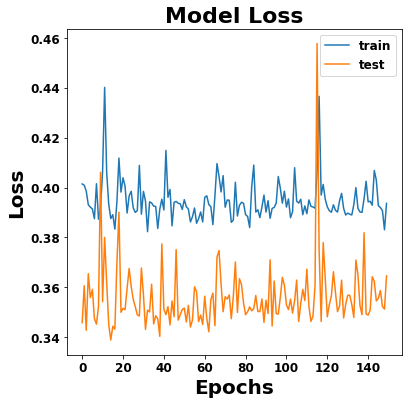

In [ ]:
plt.rcParams['figure.figsize']=(6,6)

plt.plot(history1.history['loss'], label='train')
plt.plot(history1.history['val_loss'], label='test')
plt.title('Model Loss',fontsize=22,weight='bold')
plt.ylabel('Loss',fontsize=20,weight='bold')
plt.xlabel('Epochs',fontsize=20,weight='bold')
plt.legend()

plt.show()

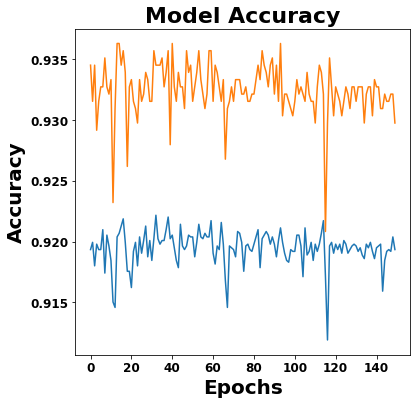

In [ ]:
plt.plot(history1.history['output2_output1_binary_accuracy'], label='train')
plt.plot(history1.history['val_output2_output1_binary_accuracy'], label='test')
plt.title('Model Accuracy',fontsize=22,weight='bold')
plt.ylabel('Accuracy',fontsize=20,weight='bold')
plt.xlabel('Epochs',fontsize=20,weight='bold')
plt.show()

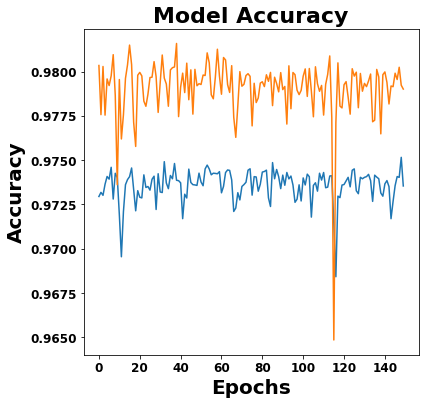

In [ ]:
plt.plot(history1.history['output2_output1_auc_2'], label='train')
plt.plot(history1.history['val_output2_output1_auc_2'], label='test')
plt.title('Model Accuracy',fontsize=22,weight='bold')
plt.ylabel('Accuracy',fontsize=20,weight='bold')
plt.xlabel('Epochs',fontsize=20,weight='bold')
plt.show()

In [ ]:
'''hist = pd.DataFrame(history1.history)
hist.to_csv('F:\jrf-project\Data\Server data\GAN\Rev_sens\90_bin.csv')'''

In [ ]:
yhat = model1.predict([x1_test,x2_test,x3_test])

In [ ]:
yhat1=pd.DataFrame(yhat[0],columns=['S1','S2','S3'])
yhat1.describe()

,S1,S2,S3
count,280.000000,280.000000,280.000000
mean,0.210085,0.165244,0.214305
std,0.083972,0.289153,0.384902
min,0.022151,0.000018,0.001549
25%,0.164340,0.000098,0.004716
50%,0.255282,0.000209,0.008910
75%,0.281591,0.001272,0.020909
max,0.289872,0.677248,0.956076


In [ ]:
yhat2=pd.DataFrame(yhat[1],columns=['S1','S2','S3'])
yhat2.describe()

,S1,S2,S3
count,280.000000,280.000000,280.000000
mean,0.949799,0.938220,0.927135
std,0.019730,0.109210,0.141533
min,0.930657,0.719461,0.543411
25%,0.934904,0.999727,0.998167
50%,0.939499,0.999939,0.999260
75%,0.955794,0.999968,0.999675
max,0.998082,0.999994,0.999940


In [ ]:
print(len(np.where(yhat1['S1']>0.284)[0]))
print(len(np.where(YD1_test['S1']==1)[0]))

44
43


In [ ]:
# Selecting appropriate thresholds for high classification accuracy

yhat1['S1']=np.where(yhat1['S1']>0.284,1,0)
yhat1['S2']=np.where(yhat1['S2']>0.67,1,0)
yhat1['S3']=np.where(yhat1['S3']>0.9,1,0)

yhat2['S1']=np.where(yhat2['S1']>0.931,1,0)
yhat2['S2']=np.where(yhat2['S2']>0.73,1,0)
yhat2['S3']=np.where(yhat2['S3']>0.6,1,0)

In [ ]:
# False Positives and True Positives

from sklearn.metrics import roc_auc_score, roc_curve, auc

fp1 = dict()
tp1 = dict()
roc_au1 = dict()
for i in range(3):
    fp1[i], tp1[i], _ = roc_curve(YD1_test.iloc[:, i].values, yhat[0][:,i])
    roc_au1[i] = auc(fp1[i], tp1[i])
    
#print(fp1, tp1)
print(roc_au1)

fp2 = dict()
tp2 = dict()
roc_au2 = dict()
for i in range(3):
    fp2[i], tp2[i], _ = roc_curve(YD2_test.iloc[:, i].values, yhat[1][:, i])
    roc_au2[i] = auc(fp2[i], tp2[i])
    
#print(fp2, tp2)
print(roc_au2)

{0: 0.6157393778824453, 1: 0.9501579338535859, 2: 0.992969696969697}
{0: 0.6318407960199005, 1: 0.8926373106060607, 2: 0.9270856631626033}


In [ ]:
fp1 = dict()
tp1 = dict()
roc_au1 = dict()
for i in range(3):
    fp1[i], tp1[i], _ = roc_curve(YD1_test.iloc[:, i].values, yhat[0][:,i])
    roc_au1[i] = auc(fp1[i], tp1[i])
    
#print(fp1, tp1)
print(roc_au1)

fp2 = dict()
tp2 = dict()
roc_au2 = dict()
for i in range(3):
    fp2[i], tp2[i], _ = roc_curve(YD2_test.iloc[:, i].values, yhat[1][:, i])
    roc_au2[i] = auc(fp2[i], tp2[i])
    
#print(fp2, tp2)
print(roc_au2)

{0: 0.6157393778824453, 1: 0.9501579338535859, 2: 0.992969696969697}
{0: 0.6318407960199005, 1: 0.8926373106060607, 2: 0.9270856631626033}


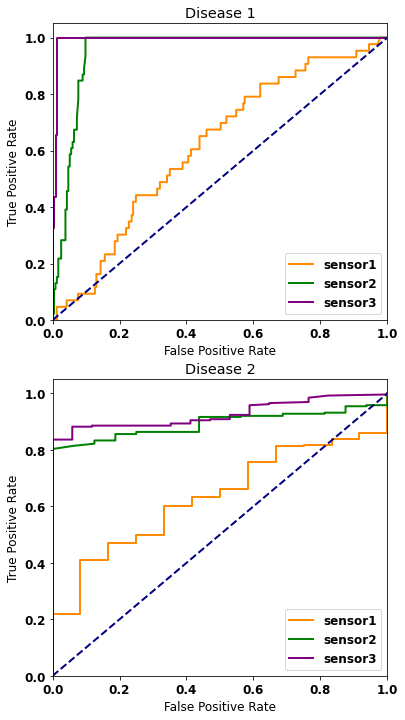

In [ ]:
fig,axs = plt.subplots(2, figsize=(6,12))

lw = 2
axs[0].plot(fp1[0], tp1[0], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_au1[0])
axs[0].plot(fp1[1], tp1[1], color='green',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_au1[1])
axs[0].plot(fp1[2], tp1[2], color='purple',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_au1[2])
axs[0].plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
axs[0].set_xlim([0.0, 1.0])
axs[0].set_ylim([0.0, 1.05])
axs[0].set_xlabel('False Positive Rate')
axs[0].set_ylabel('True Positive Rate')
axs[0].set_title('Disease 1')
axs[0].legend(['sensor1','sensor2', 'sensor3'],loc="lower right")

axs[1].plot(fp2[0], tp2[0], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_au1[0])
axs[1].plot(fp2[1], tp2[1], color='green',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_au1[1])
axs[1].plot(fp2[2], tp2[2], color='purple',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_au1[2])
axs[1].plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
axs[1].set_xlim([0.0, 1.0])
axs[1].set_ylim([0.0, 1.05])
axs[1].set_xlabel('False Positive Rate')
axs[1].set_ylabel('True Positive Rate')
axs[1].set_title('Disease 2')
axs[1].legend(['sensor1','sensor2', 'sensor3'],loc="lower right")

#plt.title('Receiver operating characteristic example')
plt.show()

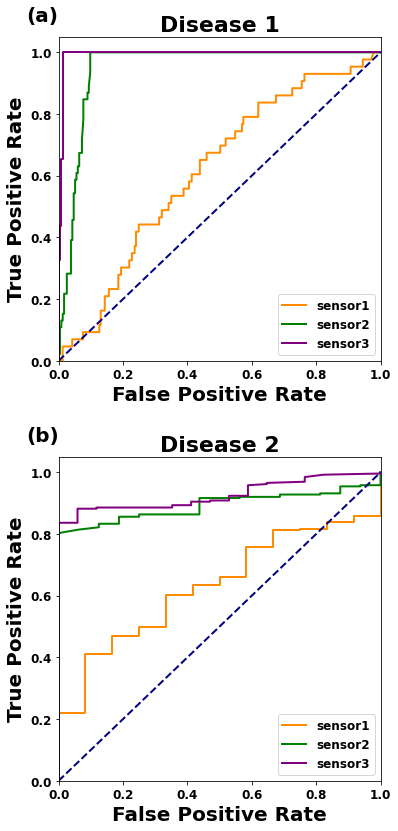

In [ ]:
fig,axs = plt.subplots(2, figsize=(6,12))

lw = 2
axs[0].plot(fp1[0], tp1[0], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_au1[0])
axs[0].plot(fp1[1], tp1[1], color='green',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_au1[1])
axs[0].plot(fp1[2], tp1[2], color='purple',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_au1[2])
axs[0].plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
axs[0].set_xlim([0.0, 1.0])
axs[0].set_ylim([0.0, 1.05])
axs[0].set_xlabel('False Positive Rate',weight='bold',fontsize=20)
axs[0].set_ylabel('True Positive Rate',weight='bold',fontsize=20)
axs[0].set_title('Disease 1',weight='bold',fontsize=22)
axs[0].legend(['sensor1','sensor2', 'sensor3'],loc="lower right")
axs[0].text(-0.1,1.1,'(a)',fontsize=20)

axs[1].plot(fp2[0], tp2[0], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_au1[0])
axs[1].plot(fp2[1], tp2[1], color='green',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_au1[1])
axs[1].plot(fp2[2], tp2[2], color='purple',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_au1[2])
axs[1].plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
axs[1].set_xlim([0.0, 1.0])
axs[1].set_ylim([0.0, 1.05])
axs[1].set_xlabel('False Positive Rate',weight='bold',fontsize=20)
axs[1].set_ylabel('True Positive Rate',weight='bold',fontsize=20)
axs[1].set_title('Disease 2',weight='bold',fontsize=22)
axs[1].legend(['sensor1','sensor2', 'sensor3'],loc="lower right")
axs[1].text(-0.1,1.1,'(b)',fontsize=20)

#plt.title('Receiver operating characteristic example')
plt.tight_layout(pad=2.0)
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_fscore_support,accuracy_score

p11,r11,f11,s11 = precision_recall_fscore_support(YD1_test.iloc[:,0].values, yhat1.iloc[:,0].values, average=None, labels=[1])
p21,r21,f21,s21 = precision_recall_fscore_support(YD1_test.iloc[:,1].values, yhat1.iloc[:,1].values, average=None, labels=[1])
p31,r31,f31,s31 = precision_recall_fscore_support(YD1_test.iloc[:,2].values, yhat1.iloc[:,2].values, average=None, labels=[1])

print('DISEASE 1')
print('For sensor1: Precision='+str(p11),'Recall='+str(r11),'F_score='+str(f11),'Support='+str(s11))
print('For sensor2: Precision='+str(p21),'Recall='+str(r21),'F_score='+str(f21),'Support='+str(s21))
print('For sensor3: Precision='+str(p31),'Recall='+str(r31),'F_score='+str(f31),'Support='+str(s31))
print('Subset accuracy: {0}'.format(accuracy_score(YD1_test, yhat1, normalize=True, sample_weight=None)))

DISEASE 1
For sensor1: Precision=[0.20454545] Recall=[0.20930233] F_score=[0.20689655] Support=[43]
For sensor2: Precision=[0.68292683] Recall=[0.60869565] F_score=[0.64367816] Support=[46]
For sensor3: Precision=[0.94827586] Recall=[1.] F_score=[0.97345133] Support=[55]
Subset accuracy: 0.6535714285714286


In [ ]:
p12,r12,f12,s12 = precision_recall_fscore_support(YD2_test.iloc[:,0].values, yhat2.iloc[:,0].values, average=None, labels=[1])
p22,r22,f22,s22 = precision_recall_fscore_support(YD2_test.iloc[:,1].values, yhat2.iloc[:,1].values, average=None, labels=[1])
p32,r32,f32,s32 = precision_recall_fscore_support(YD2_test.iloc[:,2].values, yhat2.iloc[:,2].values, average=None, labels=[1])

print('DISEASE 2')
print('For sensor1: Precision='+str(p12),'Recall='+str(r12),'F_score='+str(f12),'Support='+str(s12))
print('For sensor2: Precision='+str(p22),'Recall='+str(r22),'F_score='+str(f22),'Support='+str(s22))
print('For sensor3: Precision='+str(p32),'Recall='+str(r32),'F_score='+str(f32),'Support='+str(s32))
print('Subset accuracy: {0}'.format(accuracy_score(YD2_test, yhat2, normalize=True, sample_weight=None)))

DISEASE 2
For sensor1: Precision=[0.95588235] Recall=[0.97014925] F_score=[0.96296296] Support=[268]
For sensor2: Precision=[0.9469697] Recall=[0.9469697] F_score=[0.9469697] Support=[264]
For sensor3: Precision=[0.96168582] Recall=[0.95437262] F_score=[0.95801527] Support=[263]
Subset accuracy: 0.7607142857142857
